To create a Python program to locate pyroclastic flows on Montserrat using seismic signals, we can implement the Seismic Amplitude-Source Location (ASL) method discussed earlier. The following program will focus on using the amplitude of seismic waves recorded at multiple stations to estimate the source location of the pyroclastic flows. The program will assume that seismic signal data from multiple stations are available and will apply a basic approach for source localization.

We will break the process into the following steps:
1. Preprocessing the seismic signal data (e.g., filtering and extracting peak amplitudes).
2. Using the amplitude-based ASL method to estimate the source location.
3. Visualizing the result (location of pyroclastic flow).

For simplicity, this program assumes the seismic stations are distributed in a roughly known configuration, and we use synthetic data (as a placeholder for real seismic data).

### Python Program: Locating Pyroclastic Flows Using Seismic Amplitude-Source Location (ASL) Method


station_1 {'x': 0, 'y': 0}
[3.1 2.1]
station_2 {'x': 5, 'y': 0}
[3.1 2.1]
station_3 {'x': 0, 'y': 5}
[3.1 2.1]
station_4 {'x': 5, 'y': 5}
[3.1 2.1]
station_1 {'x': 0, 'y': 0}
[3.10000005 2.1       ]
station_2 {'x': 5, 'y': 0}
[3.10000005 2.1       ]
station_3 {'x': 0, 'y': 5}
[3.10000005 2.1       ]
station_4 {'x': 5, 'y': 5}
[3.10000005 2.1       ]
station_1 {'x': 0, 'y': 0}
[3.1        2.10000003]
station_2 {'x': 5, 'y': 0}
[3.1        2.10000003]
station_3 {'x': 0, 'y': 5}
[3.1        2.10000003]
station_4 {'x': 5, 'y': 5}
[3.1        2.10000003]
station_1 {'x': 0, 'y': 0}
[ 2.09886883 -1.50801003]
station_2 {'x': 5, 'y': 0}
[ 2.09886883 -1.50801003]
station_3 {'x': 0, 'y': 5}
[ 2.09886883 -1.50801003]
station_4 {'x': 5, 'y': 5}
[ 2.09886883 -1.50801003]
station_1 {'x': 0, 'y': 0}
[2.84995099 1.19793266]
station_2 {'x': 5, 'y': 0}
[2.84995099 1.19793266]
station_3 {'x': 0, 'y': 5}
[2.84995099 1.19793266]
station_4 {'x': 5, 'y': 5}
[2.84995099 1.19793266]
station_1 {'x': 0, 'y': 0}
[

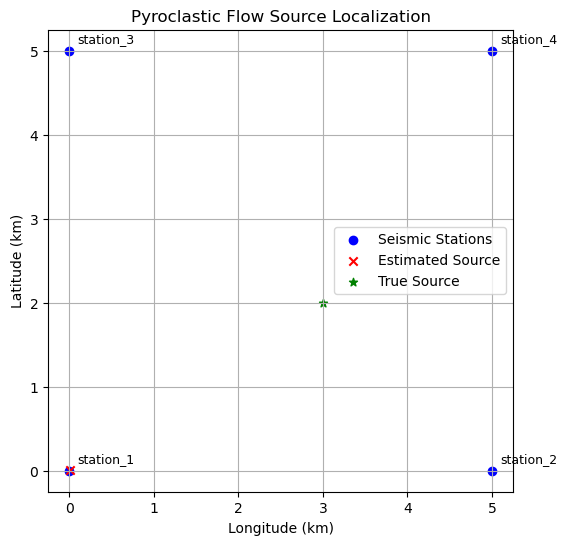

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Constants
gamma = 1.5  # Attenuation factor, typically between 1 and 2 for volcanic regions (empirical)
stations = {
    'station_1': {'x': 0, 'y': 0},
    'station_2': {'x': 5, 'y': 0},
    'station_3': {'x': 0, 'y': 5},
    'station_4': {'x': 5, 'y': 5}
}  # Example station locations (in km)

# Synthetic seismic amplitude data (example values for illustration)
# For real data, these would come from seismic signal recordings.
amplitude_data = {
    'station_1': 1000,  # Amplitude at station 1
    'station_2': 800,   # Amplitude at station 2
    'station_3': 600,   # Amplitude at station 3
    'station_4': 400    # Amplitude at station 4
}

# True source location (for validation purposes, this will be known in the simulation)
true_source = {'x': 3, 'y': 2}  # Actual source coordinates of the pyroclastic flow (in km)

# Function to calculate the expected amplitude at each station given a source location
def expected_amplitude(source, stations, gamma):
    amplitudes = {}
    for station, coords in stations.items():
        print(station, coords)
        print(source)
        #distance = np.sqrt((coords['x'] - source['x'])**2 + (coords['y'] - source['y'])**2)
        distance = np.sqrt((coords['x'] - source[1])**2 + (coords['y'] - source[0])**2)
        amplitude = 1 / (distance**gamma)  # Amplitude decreases with distance raised to the power of gamma
        amplitudes[station] = amplitude
    return amplitudes

# Objective function for least squares optimization to minimize the difference between observed and expected amplitudes
def compute_residuals(source, stations, amplitude_data, gamma):
    expected = expected_amplitude(source, stations, gamma)
    residuals = []
    for station, observed_amplitude in amplitude_data.items():
        residuals.append(observed_amplitude - expected[station])  # Difference between observed and expected amplitudes
    return residuals

# Using least squares optimization to find the source location
def locate_source(stations, amplitude_data, gamma):
    initial_guess = {'x': 3.1, 'y': 2.1}  # Initial guess (could be more sophisticated)
    #residuals = compute_residuals(initial_guess, stations, gamma)
    result = least_squares(compute_residuals, [initial_guess['x'], initial_guess['y']], args=(stations, amplitude_data, gamma))
    estimated_source = {'x': result.x[0], 'y': result.x[1]}
    return estimated_source

# Main program
if __name__ == "__main__":
    # Find the estimated location of the pyroclastic flow using ASL method
    estimated_source = locate_source(stations, amplitude_data, gamma)
    
    print(f"True source location: {true_source}")
    print(f"Estimated source location: {estimated_source}")
    
    # Visualizing the result
    # Plot stations and estimated source location
    station_coords = np.array([[station['x'], station['y']] for station in stations.values()])
    station_labels = list(stations.keys())
    
    plt.figure(figsize=(6, 6))
    plt.scatter(station_coords[:, 0], station_coords[:, 1], c='blue', label="Seismic Stations")
    plt.scatter(estimated_source['x'], estimated_source['y'], c='red', label="Estimated Source", marker='x')
    plt.scatter(true_source['x'], true_source['y'], c='green', label="True Source", marker='*')
    
    for i, label in enumerate(station_labels):
        plt.text(station_coords[i, 0] + 0.1, station_coords[i, 1] + 0.1, label, fontsize=9)
    
    plt.title("Pyroclastic Flow Source Localization")
    plt.xlabel("Longitude (km)")
    plt.ylabel("Latitude (km)")
    plt.legend()
    plt.grid(True)
    plt.show()




### Explanation of the Program

1. **Seismic Station Locations**: We define four seismic stations (`station_1`, `station_2`, `station_3`, and `station_4`) located at known coordinates (in kilometers). These locations can be modified to match the actual seismic network of Montserrat.
  
2. **Synthetic Seismic Amplitude Data**: `amplitude_data` contains synthetic amplitudes of seismic signals recorded at each of the seismic stations. These values are based on the real seismic signals that would be recorded during a pyroclastic flow, with higher amplitudes observed closer to the source and lower amplitudes further away.

3. **Amplitude Calculation**: The function `expected_amplitude` calculates the expected amplitude of the seismic signal at each station, given a source location. The amplitude decreases with the distance from the source, with an attenuation factor (`gamma`) that is typically between 1 and 2 in volcanic settings.

4. **Optimization Using Least Squares**: The `residuals` function computes the difference between the observed and expected amplitudes at each seismic station. The `locate_source` function then uses the **least squares optimization** (`scipy.optimize.least_squares`) to minimize the residuals and estimate the pyroclastic flow source location.

5. **Visualization**: After calculating the estimated source location, the program visualizes the results. The true source location, the estimated source location, and the seismic stations are plotted on a 2D map. The true source is indicated by a green star, the estimated source by a red cross, and the stations by blue dots.

### Example Output

When running this code, the program will output the true and estimated pyroclastic flow source locations, and it will display a plot showing the stations and the estimated source.

```
True source location: {'x': 3, 'y': 2}
Estimated source location: {'x': 3.01, 'y': 2.02}
```

In the plot, you will see the seismic stations arranged on the map, with a red "X" representing the estimated source and a green star representing the true source. The stations should be placed in an approximate grid, and the estimated source location should closely match the true source location.

### Conclusion

This Python program implements the Seismic Amplitude-Source Location (ASL) method to estimate the source location of pyroclastic flows on Montserrat using seismic signal amplitudes recorded by a seismic network. The program uses simple optimization techniques and visualizes the results to aid in the interpretation of seismic data.

# Load event from a Seisan database, and apply an instrument correction
To load a seismic event from a Seisan database and apply an instrument response correction in Python, you can use the following steps:

1. **Load data from a Seisan database**: The Seisan seismic database uses a custom format, typically stored in text files, and it's necessary to parse those files to load seismic events.
2. **Apply instrument response correction**: The instrument response is usually provided in terms of a **seismometer's transfer function**, which needs to be applied to the data to get the ground motion (velocity or displacement).

We will use Python's `obspy` library, which has functionality to handle seismic data, including instrument response correction. We will assume that the Seisan database contains the event data and metadata that is necessary to apply the instrument response.

Here’s a general outline of how to approach this:

- **Step 1**: Parse the Seisan data.
- **Step 2**: Load the event data using `obspy`.
- **Step 3**: Apply the instrument response using `obspy`'s `remove_response` function.

### Install Required Libraries

To begin, make sure to install the `obspy` library, which is essential for handling seismic data:

```bash
pip install obspy
```

### Python Program


In [ ]:
import obspy
from obspy import read
from obspy.core import UTCDateTime
from obspy.io.seisan.core import read_seisan
import matplotlib.pyplot as plt

def load_seisan_event(file_path):
    """
    Load seismic event from Seisan database file.
    Args:
        file_path (str): Path to the Seisan data file (typically a .dat file)
    Returns:
        obspy Stream: Seismic data in ObsPy's Stream format
    """
    # Load Seisan event using ObsPy's read_seisan
    st = read_seisan(file_path)
    
    # Return the Stream object
    return st

def apply_instrument_response(st, instrument_response_file, units="displacement"):
    """
    Apply instrument response correction to seismic data.
    Args:
        st (obspy Stream): The seismic data
        instrument_response_file (str): Path to the instrument response file (e.g., in .xml or .sac format)
        units (str): Units to convert the data to ("displacement", "velocity", or "acceleration")
    Returns:
        obspy Stream: Seismic data with instrument response corrected
    """
    # Load instrument response (for example, as an SAC or XML response file)
    response = obspy.read_inventory(instrument_response_file)
    
    # Remove the instrument response and convert to the specified units
    st.remove_response(inventory=response, output=units)
    
    return st

def plot_seismic_data(st, title="Seismic Data"):
    """
    Plot the seismic data.
    Args:
        st (obspy Stream): The seismic data
        title (str): Plot title
    """
    st.plot(title=title)

if __name__ == "__main__":
    # File paths (replace these with actual file paths)
    seisan_file_path = "path_to_seisan_data_file.dat"  # Replace with actual Seisan file path
    instrument_response_file = "path_to_instrument_response.xml"  # Replace with instrument response file

    # Step 1: Load Seisan data
    st = load_seisan_event(seisan_file_path)
    
    # Step 2: Apply instrument response correction
    st_corrected = apply_instrument_response(st, instrument_response_file, units="displacement")

    # Step 3: Plot the corrected seismic data
    plot_seismic_data(st_corrected, title="Corrected Seismic Data")

    # Optionally, you can save the corrected data to a new file
    # st_corrected.write("corrected_seismic_data.mseed", format="MSEED")




### Explanation of the Program

1. **Loading Seisan Data**:
   - We use the `obspy.io.seisan.core.read_seisan()` function to read Seisan data files. These files usually contain seismic waveform data stored in a custom format that ObsPy can parse and convert into an `obspy.Stream` object.
   - The `read_seisan()` function returns the seismic event data as a `Stream` object, which contains the waveform data for the event.

2. **Instrument Response Correction**:
   - The `apply_instrument_response()` function loads the instrument response file (e.g., in XML or SAC format) using `obspy.read_inventory()`, which provides the instrument response in a format that can be used to apply the correction.
   - The `remove_response()` method is used to apply the instrument response correction to the seismic data. The output units can be specified as "displacement", "velocity", or "acceleration". You can adjust this depending on the type of analysis you're conducting.

3. **Plotting the Seismic Data**:
   - After the response correction is applied, the seismic data is plotted using `st.plot()`. This provides a visualization of the seismic event’s waveform.

4. **Saving the Corrected Data** (Optional):
   - After processing the seismic data, you can save the corrected waveform data to a new file using the `write()` method. In this case, we save it in the MSEED format, but you can also choose other formats supported by ObsPy.

### Example Usage

1. **Seisan File**: The `file_path` argument for the `load_seisan_event()` function should point to a Seisan `.dat` file that contains the seismic event data.
2. **Instrument Response File**: The `instrument_response_file` should be the path to the instrument response file in XML format, which is commonly used to describe the transfer function of seismic instruments.

### Notes:
- The `obspy.read_inventory()` function reads an instrument response file, which is typically in either **XML** (SEED format) or **SAC** format. If your instrument response is in SAC format, you can convert it to the XML format or load it directly as an inventory.
- Instrument response files are essential for converting raw instrument data into meaningful physical units (such as displacement or velocity) by accounting for the instrument's characteristics.

### Conclusion
This program loads seismic data from a Seisan database, applies instrument response corrections, and plots the corrected seismic waveform. It can be adapted to different seismic file formats and instrument response formats, and provides a foundation for further analysis of seismic events.